In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [2]:
# Read the csv file using 'read_csv'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Top 5 records of train dataframe
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [4]:
# Check the number of rows and columns in the train dataframe
train.shape

(18359, 14)

In [5]:
# Check the column-wise info of the train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


### Data Visualization

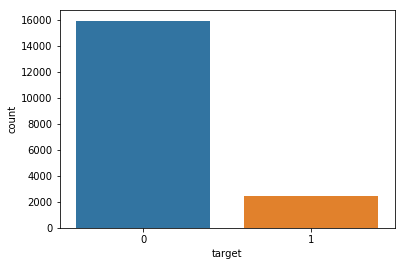

In [6]:
sns.countplot(train['target'])
plt.show()

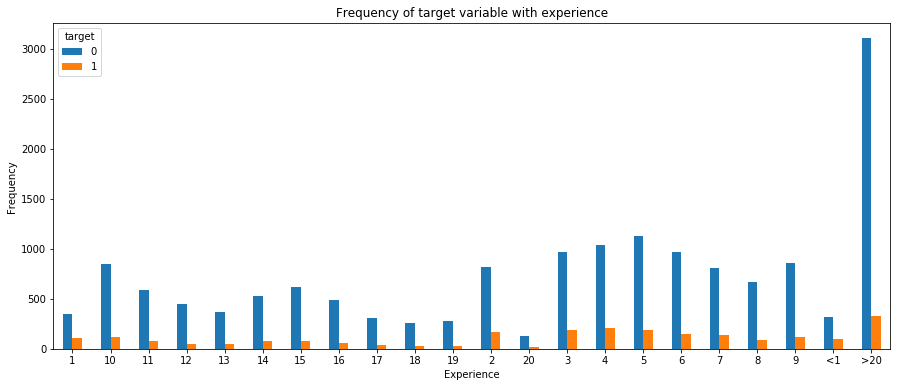

In [7]:
# See the target frequency with the Insurence type
pd.crosstab(train['experience'],train['target'] ).plot(kind="bar",figsize=(15,6))
plt.title('Frequency of target variable with experience')
plt.xticks(rotation=0)
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

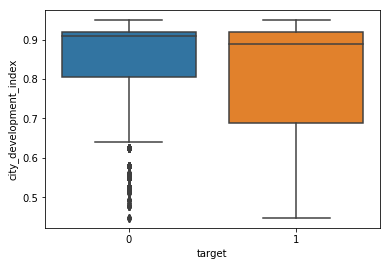

In [8]:
# Outlier analysis for debt_to_ratio with target variable
sns.boxplot(x='target',y = 'city_development_index',data=train)

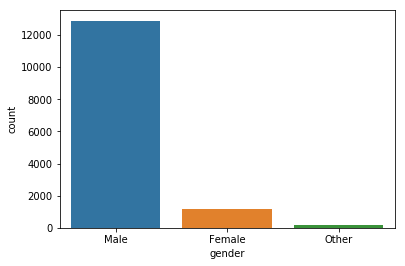

In [9]:
sns.countplot(train['gender'])
plt.show()

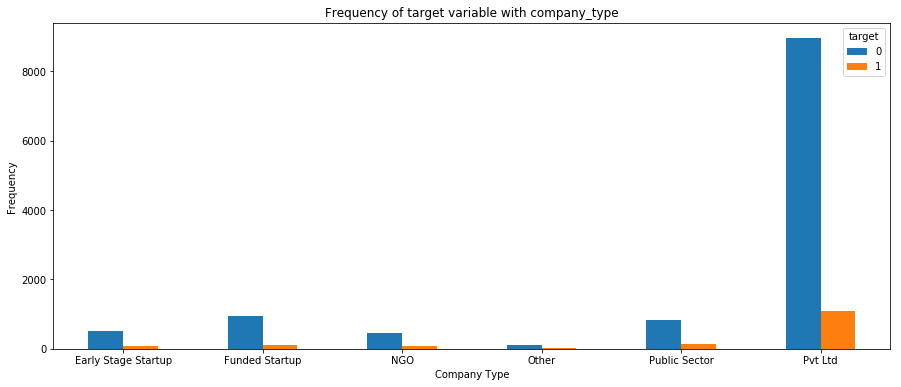

In [10]:
# See the target frequency with the Insurence type
pd.crosstab(train['company_type'],train['target'] ).plot(kind="bar",figsize=(15,6))
plt.title('Frequency of target variable with company_type')
plt.xticks(rotation=0)
plt.xlabel('Company Type')
plt.ylabel('Frequency')
plt.show()

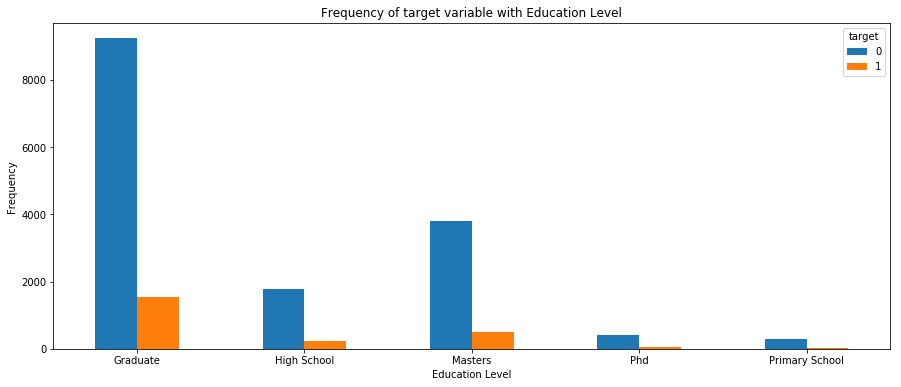

In [11]:
# See the target frequency with the Insurence type
pd.crosstab(train['education_level'],train['target'] ).plot(kind="bar",figsize=(15,6))
plt.title('Frequency of target variable with Education Level')
plt.xticks(rotation=0)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

### Data cleaning and Data Prepration

In [12]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [13]:
round(100*(train.isnull().sum()/len(train)),2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    22.32
relevent_experience        0.00
enrolled_university        1.86
education_level            2.49
major_discipline          15.46
experience                 0.32
company_size              26.03
company_type              27.45
last_new_job               2.00
training_hours             0.00
target                     0.00
dtype: float64

In [14]:
test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [15]:
round(100*(test.isnull().sum()/len(test)),2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    22.56
relevent_experience        0.00
enrolled_university        1.86
education_level            2.63
major_discipline          15.93
experience                 0.29
company_size              26.97
company_type              28.83
last_new_job               2.02
training_hours             0.00
dtype: float64

In [16]:
train['major_discipline'].value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [17]:
train['company_size'].value_counts()

50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [18]:
train['gender'].fillna("Male", inplace=True)
train['major_discipline'].fillna("STEM", inplace=True)
train['company_type'].fillna("Pvt Ltd", inplace=True)
train['company_size'].fillna("50-990", inplace=True)
test['gender'].fillna("Male", inplace=True)
test['major_discipline'].fillna("STEM", inplace=True)
test['company_type'].fillna("Pvt Ltd", inplace=True)
test['company_size'].fillna("50-990", inplace=True)

In [19]:
# Dropping the null values from the dataframe
train.dropna(inplace=True)

In [20]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [21]:
train.drop(['enrollee_id','city'], axis=1, inplace=True)
test.drop(['enrollee_id','city'], axis=1, inplace=True)

In [22]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for x in train.columns:
    if train[x].dtype == type(object):
        train[x] = train[x].fillna('NaN')
        test[x] = test[x].fillna('NaN')
        encoder = LabelEncoder()
        encoder.fit(list(set(list(train[x]) + list(test[x]))))
        train[x] = encoder.transform(train[x])
        test[x] = encoder.transform(test[x])

In [23]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.689,1,0,3,0,5,13,1,5,0,106,0
1,0.923,1,0,3,0,5,5,8,1,0,69,0
2,0.910,1,0,3,0,5,16,4,4,1,4,0
3,0.666,1,0,3,0,5,5,4,5,0,26,0
4,0.887,1,1,3,2,5,18,5,5,1,88,1


In [24]:
test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.448,1,1,0,0,5,20,2,4,5,15
1,0.939,1,1,3,0,5,21,4,5,0,94
2,0.920,1,1,0,0,5,13,5,5,0,17
3,0.924,1,1,3,4,5,21,4,5,1,76
4,0.830,1,0,3,0,5,16,8,5,1,65


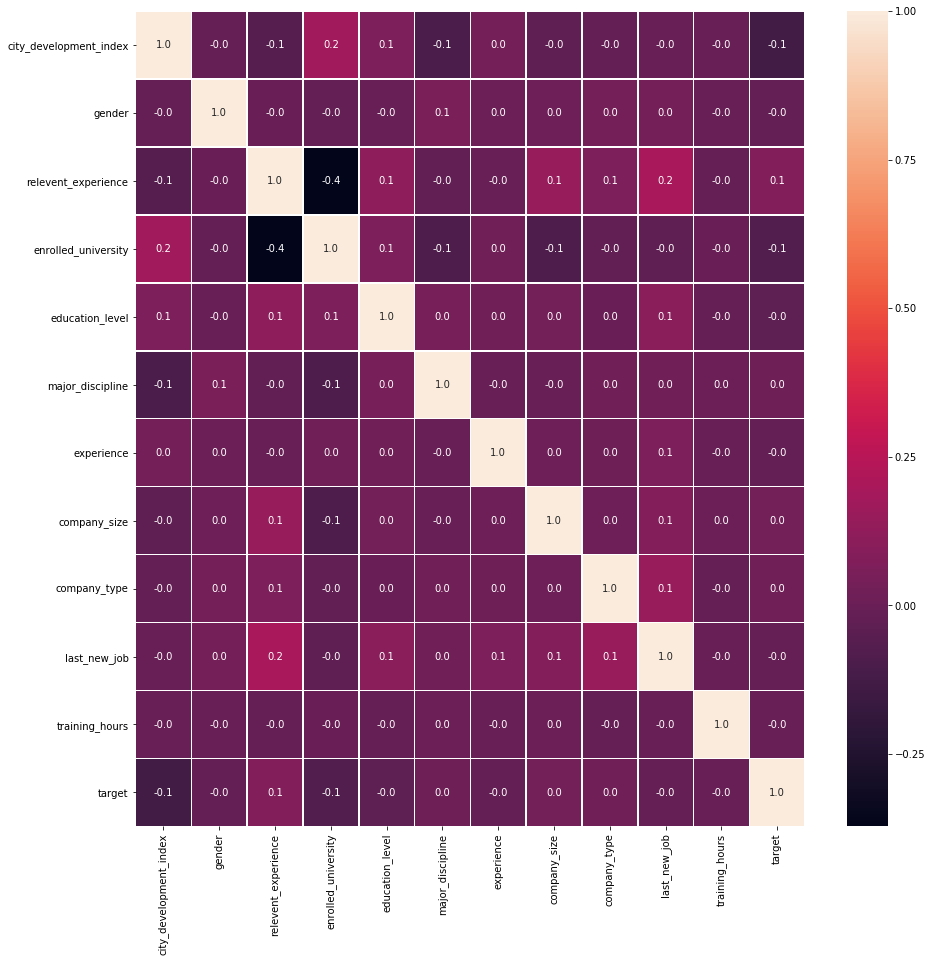

In [25]:
# plot training dataset heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
X = train.drop(['target'],axis=1)
y = train['target']

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test.copy().values)

In [28]:
# XGB Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier( learning_rate =0.1,
 n_estimators=112,
 max_depth=9,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=13,
 reg_lambda=5,
# max_delta_step=1,
 alpha=0,
 base_score=0.5,
 seed=1029)

xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb.predict(X_test)  

# Accuracy of XGB model
accuracy_xgb = round(xgb.score(X_train, y_train) * 100, 2)
print("Accuracy score of XGB algorithm is:", accuracy_xgb)

Accuracy score of XGB algorithm is: 74.58


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2410, 1360],
       [ 258,  301]], dtype=int64)

In [30]:
# Predicting the Test set results
test_pred = xgb.predict(test_data)

In [31]:
# load session_id of test dataset
test_enrollee_id = pd.read_csv('test.csv')['enrollee_id']
print(test_enrollee_id.shape)

(15021,)


In [32]:
# save results to csv
submission_file = pd.DataFrame({'enrollee_id': test_enrollee_id, 'target': test_pred})
submission_file = submission_file[['enrollee_id','target']] 
submission_file.to_csv('Final_Solution.csv', index=False)